#### 1. Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("Surprise-Housing.csv")

LotFrontage
MasVnrArea
Electrical

In [3]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Analyzing missing values

In [5]:
housing[housing['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [6]:
housing[~housing['Alley'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500


#### Since most of the rows has na as Alley, we need to consider how dummy columns are going to be created for this or we might create Labels using LabelEncoder

#### Checking Masonry area where masonry Type is None

In [7]:
print(housing[housing['MasVnrType'].isna()]['MasVnrArea'].value_counts())
print(housing[housing['MasVnrType'].isna() & housing['MasVnrArea'].isna()]['MasVnrArea'].value_counts())

MasVnrArea
0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


#### Categorical variables
MasVnrType, Alley, LotFrontage, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

In [8]:
housing[housing['GarageType'].isna() & housing['GarageYrBlt'].isna() & housing['GarageFinish'].isna()
        & housing['GarageQual'].isna() & housing['GarageCond'].isna()][['GarageType', 'GarageYrBlt',
                                                                       'GarageFinish', 'GarageQual', 'GarageCond', 'GarageArea']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0
48,NaN,NaN,NaN,NaN,NaN,0
78,NaN,NaN,NaN,NaN,NaN,0
88,NaN,NaN,NaN,NaN,NaN,0
89,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0
1407,NaN,NaN,NaN,NaN,NaN,0
1449,NaN,NaN,NaN,NaN,NaN,0
1450,NaN,NaN,NaN,NaN,NaN,0


#### All Garage Variable are NA if Garage Area is 0, so there is multicollinearity

In [9]:
housing[housing['BsmtQual'].isna() & housing['BsmtCond'].isna() & housing['BsmtExposure'].isna() & 
        housing['BsmtFinType1'].isna() & housing['BsmtFinType2'].isna()][['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,0,0,0,0
39,0,0,0,0
90,0,0,0,0
102,0,0,0,0
156,0,0,0,0
182,0,0,0,0
259,0,0,0,0
342,0,0,0,0
362,0,0,0,0
371,0,0,0,0


#### Basement related variables are NA, means no basement and thus base area related variables are 0

#### All the categorical variables having Nan values are actually NA entries. The actual missing variables to be imputed are LotFrontage, MasVnrArea, Electrical. Fetching info on these.

In [10]:
print(housing['LotFrontage'].describe(percentiles=[0.25,0.50,0.75,0.90,0.99]))
print(housing[housing['LotFrontage'].isna()].head())
print(housing['LotFrontage'].mean())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
7          Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
12         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
1

#### Since mean and median is similar, it should be okay to replace na values with mean

In [11]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].mean())

In [12]:
print(housing[housing['LotFrontage'].isna()].head())

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [13]:
print(housing['MasVnrArea'].describe())
print(housing[housing['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']])
print(housing['MasVnrType'].value_counts())

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


#### Since more than 50% of MasVnrArea is 0, filling na values with 0 

In [14]:
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0.0)
housing[housing['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [15]:
housing['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

#### Since most of Electrical belongs to SBrkr category, replacing na values with SBrkr

In [16]:
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')

#### 1. Central Air is a Yes/No var
2. None of the variable is present as object while it should be numeric


In [17]:
housing_numerical = housing.select_dtypes(include=['int64','float64'])
housing_numerical.keys

<bound method NDFrame.keys of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0      

- 'OverallQual', 'OverallCond', 'MSSubClass' need to be dropped from numerical variables since its a categorical one
- id is of no value in this dataset, so dropping the same

In [18]:
housing_numerical = housing_numerical.drop(['Id', 'OverallQual', 'OverallCond', 'MSSubClass'], axis=1)

### Checking correlation between numerical values

In [19]:
housing_num_corr = housing_numerical.corr()
housing_num_corr

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.306795,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,0.306795,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.117598,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.082746,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.178699,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.215828,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.043340,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.363358,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.414266,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


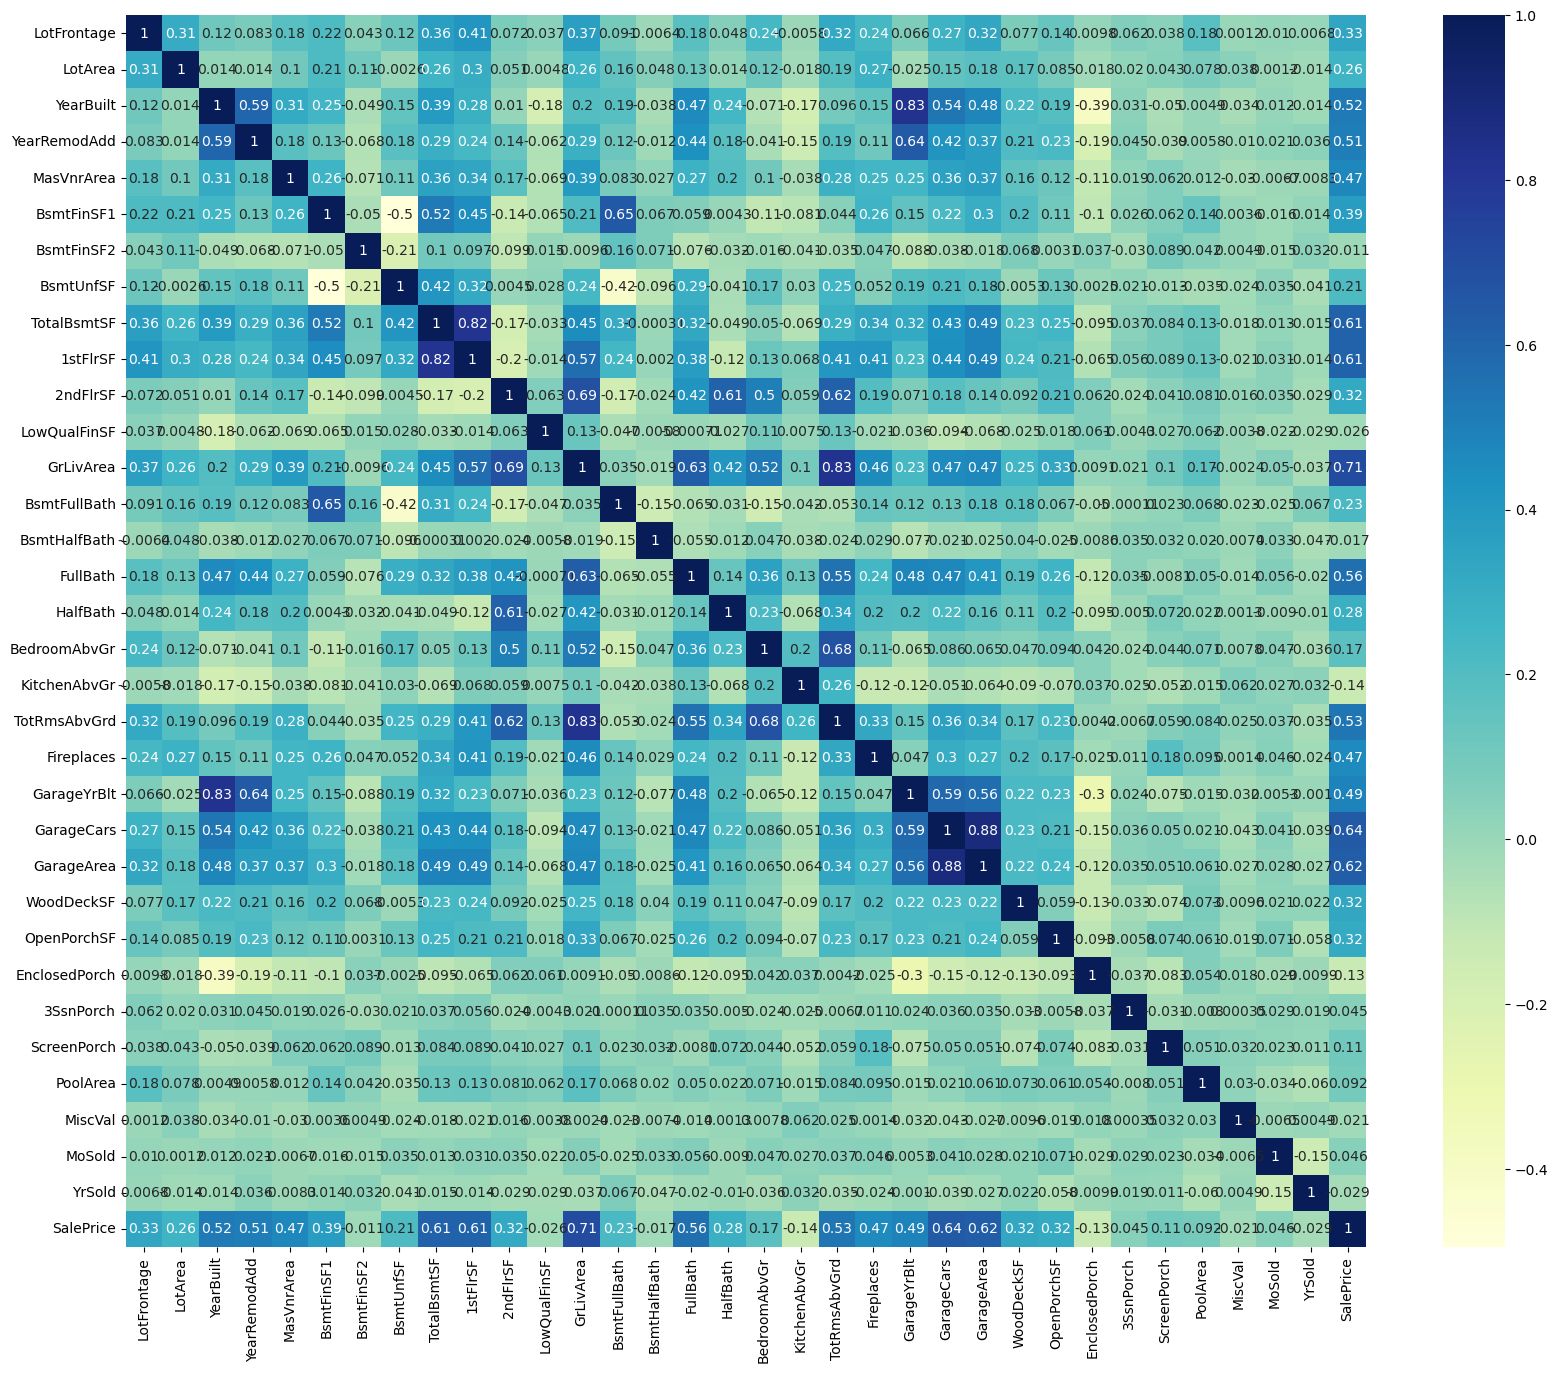

In [20]:
plt.figure(figsize=(20,16))

# heatmap
sns.heatmap(housing_num_corr, cmap="YlGnBu", annot=True)
plt.show()

#### Heatmap/correlation map insights
- SalePrice has linear relationship with many variables
- GarageYr Built -> YearBuilt
- Total Rooms abvGrd -> GrLivArea, BedroomAbvgrd
- Garage Area -> Garage Cars
- Totalbsmtsf -> 1stFlrSF
- and many more .

#### We need to mindful of multicollinearity when building model

#### OverallQual and OverallCond should be categorical variables and hence converting those to object

In [21]:
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['MSSubClass'] = housing['MSSubClass'].astype('object')

#### change centralair to 0/1 instead of yes/no

In [22]:
housing['CentralAir'] = housing['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
housing['CentralAir'].value_counts()

CentralAir
1    1365
0      95
Name: count, dtype: int64

In [23]:
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### find the numeric variables

LotFrontage, LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, 
GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageCars,GarageArea,

In [24]:
housing['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64


### drop the exact column instead of drop first, Generating dummies will drop the column with 'NA' and thus there is no need to drop any column

In [25]:
dummies = pd.get_dummies(housing[['GarageType']])
dummies

,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,False,False,False,False,True
4,False,True,False,False,False,False
...,...,...,...,...,...,...
1455,False,True,False,False,False,False
1456,False,True,False,False,False,False
1457,False,True,False,False,False,False
1458,False,True,False,False,False,False


#### Split the variables into X and y

In [26]:
X = housing.iloc[:,:-1]
X = X.drop(['Id'], axis=1)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


### Checking if there are any NaN values. If yes, handling the same

In [27]:
X.isna().any(axis=1).sum()

1460

In [28]:
housing['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


#### GarageYrBlt has na values. There is no clear way of indicatinhg how the na values should be filled. Also GarageYrBlt is highly correlated with yrBlt. hence It makes sense to drop this column

In [29]:
X = X.drop(['GarageYrBlt'], axis=1)

In [30]:
X.shape

(1460, 78)

In [31]:
y= housing.iloc[:,-1:]
y.shape

(1460, 1)

In [32]:
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [33]:
le = LabelEncoder()
for series_name, series in housing_categorical.items():
    housing_categorical[series_name] = le.fit_transform(housing_categorical[series_name])

In [34]:
housing_categorical

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,5,3,1,2,3,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
1,0,3,1,2,3,3,0,2,0,24,...,1,1,4,4,2,3,4,4,8,4
2,5,3,1,2,0,3,0,4,0,5,...,1,1,4,4,2,3,4,4,8,4
3,6,3,1,2,0,3,0,0,0,6,...,5,2,4,4,2,3,4,4,8,0
4,5,3,1,2,0,3,0,2,0,15,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,1,2,3,3,0,4,0,8,...,1,1,4,4,2,3,4,4,8,4
1456,0,3,1,2,3,3,0,4,0,14,...,1,2,4,4,2,3,2,4,8,4
1457,6,3,1,2,3,3,0,4,0,6,...,1,1,4,4,2,3,0,2,8,4
1458,0,3,1,2,3,3,0,4,0,12,...,1,2,4,4,2,3,4,4,8,4


In [35]:
housing_categorical['Alley'].value_counts()

Alley
2    1369
0      50
1      41
Name: count, dtype: int64

In [36]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [37]:
X = X.drop(list(housing_categorical.columns), axis=1)

In [38]:
X = pd.concat([X, housing_categorical], axis=1)
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,65.0,8450,2003,2003,196.0,706,0,150,856,1,...,1,1,4,4,2,3,4,4,8,4
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1,...,1,1,4,4,2,3,4,4,8,4
2,68.0,11250,2001,2002,162.0,486,0,434,920,1,...,1,1,4,4,2,3,4,4,8,4
3,60.0,9550,1915,1970,0.0,216,0,540,756,1,...,5,2,4,4,2,3,4,4,8,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,1,...,1,1,4,4,2,3,4,4,8,4
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,1,...,1,2,4,4,2,3,2,4,8,4
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1,...,1,1,4,4,2,3,0,2,8,4
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1,...,1,2,4,4,2,3,4,4,8,4


In [39]:
from sklearn.preprocessing import scale

In [40]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'F

In [41]:
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-0.229372,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,0.263813,...,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.063305,0.457447,0.191594,0.313867,0.208502
1,0.451936,-0.091886,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.263813,...,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.063305,0.457447,0.191594,0.313867,0.208502
2,-0.093110,0.073480,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,0.263813,...,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.063305,0.457447,0.191594,0.313867,0.208502
3,-0.456474,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,0.263813,...,1.301075,0.801942,0.11211,0.0689,0.289745,0.063305,0.457447,0.191594,0.313867,-3.426284
4,0.633618,0.375148,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,0.263813,...,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.063305,0.457447,0.191594,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.365633,-0.260560,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,0.263813,...,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.063305,0.457447,0.191594,0.313867,0.208502
1456,0.679039,0.266407,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,0.263813,...,-0.768736,0.801942,0.11211,0.0689,0.289745,0.063305,-1.390058,0.191594,0.313867,0.208502
1457,-0.183951,-0.147810,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.263813,...,-0.768736,-0.318475,0.11211,0.0689,0.289745,0.063305,-3.237563,-4.759330,0.313867,0.208502
1458,-0.093110,-0.080160,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,0.263813,...,-0.768736,0.801942,0.11211,0.0689,0.289745,0.063305,0.457447,0.191594,0.313867,0.208502


In [42]:

col = y.columns
y = pd.DataFrame(scale(y))
y.columns = col
y.columns

Index(['SalePrice'], dtype='object')

In [43]:
y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [44]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [45]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

## Linear Regression

In [46]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
print(lm.intercept_)
print(lm.coef_)

[-0.01474405]
[[-2.66429713e-02  4.05423492e-02  7.50941693e-02  2.09275413e-02
   9.77419558e-02 -1.22342140e+11 -4.32717118e+10 -1.18524831e+11
   1.17676766e+11 -1.06315613e-02 -2.03160852e+10 -2.29405851e+10
  -2.55525607e+09  2.76152169e+10  5.85527420e-02 -4.74166870e-03
   1.75933838e-02  6.11877441e-03 -1.83334351e-02 -2.82630920e-02
   4.10614014e-02  2.66590118e-02  8.63018036e-02 -5.00488281e-03
   2.75535583e-02 -1.06964111e-02 -1.69429779e-02  1.26655102e-02
   1.02653503e-02 -5.34881592e-01  4.87995148e-03 -1.66482925e-02
  -2.26988792e-02 -4.91390228e-02 -1.11651421e-02  2.68535614e-02
   1.78756714e-02 -1.11598969e-02  3.57818604e-02 -1.41277313e-02
   7.64846802e-03  2.99301147e-02  3.17859650e-02 -4.94384766e-03
  -3.72047424e-02 -5.21697998e-02 -3.82537842e-02  1.87942505e-01
   7.65628815e-02  8.97121429e-03  4.05387878e-02 -2.05745697e-02
  -4.15039062e-03  4.06074524e-02 -6.48040771e-02  1.37977600e-02
   1.38282776e-02 -1.00391388e-01  1.65462494e-02 -4.63333130e

0.8672991081518548
0.6866948560393779
SalePrice    134.256034
dtype: float64
SalePrice    140.026437
dtype: float64
0.131494646201371
0.31969506185607466


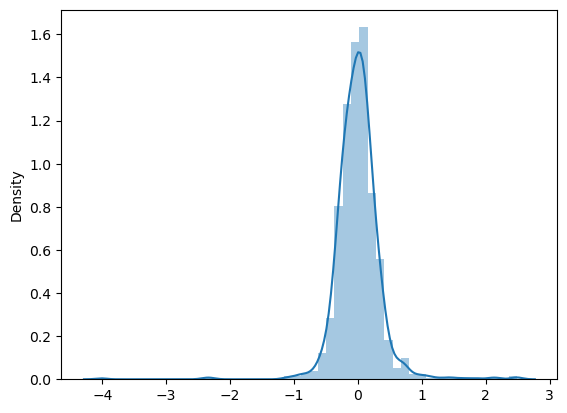

In [48]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

sns.distplot(y_train - y_pred_train, kde=True)
plt.show()

## Ridge

In [49]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
print(model_cv.best_params_)

{'alpha': 500}


In [51]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[-0.00470384  0.0320643   0.02911127  0.03742395  0.06322528  0.03367119
   0.00889274  0.00690883  0.04523473  0.00561199  0.06779413  0.06439279
  -0.01014256  0.10242914  0.04181987  0.00078269  0.05131916  0.02297629
   0.00439274 -0.02679342  0.05522185  0.03794604  0.05813867  0.04063118
   0.02998411  0.00291001 -0.00124413  0.00946198  0.01285017 -0.03985218
   0.00295873 -0.0010767  -0.01250591 -0.03356109 -0.0051068   0.01609799
   0.01524088 -0.01958986  0.02519809 -0.0105942   0.00044422  0.02250716
   0.03058658 -0.00023978 -0.01926855 -0.03098589 -0.01653201  0.12820641
   0.03414298  0.01817245  0.04212175 -0.00479688 -0.00504642  0.011013
  -0.06747514  0.0054852   0.02700581 -0.08453723  0.01223889 -0.04146772
  -0.01439913  0.00323868  0.00359817 -0.02558851  0.00193494 -0.08253221
   0.03323896 -0.04364245 -0.01255432 -0.02496323  0.01117263  0.01504417
   0.00465784 -0.05128292  0.01328431  0.01021868  0.0019463   0.01602168]]


0.8347848250407234
0.8375019157265196
SalePrice    167.151357
dtype: float64
SalePrice    72.625771
dtype: float64
0.16371337581685863
0.16581226355425976


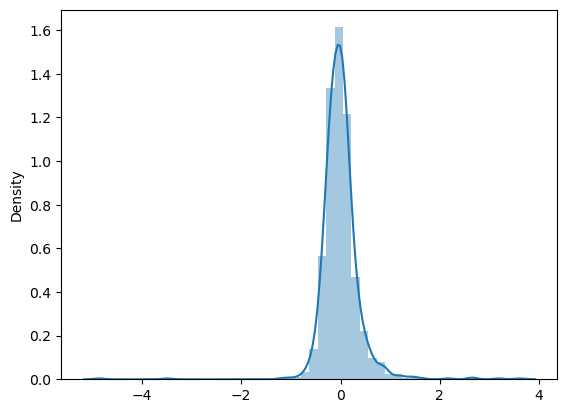

In [52]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

sns.distplot(y_train - y_pred_train, kde=True)
plt.show()

## Lasso

In [53]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [55]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [56]:
lasso.coef_

array([-0.        ,  0.03754896,  0.05733918,  0.01853848,  0.06991322,
        0.02700364,  0.00129993, -0.        ,  0.00262693,  0.        ,
        0.03192291,  0.        , -0.02413954,  0.30701654,  0.05659376,
        0.        ,  0.01303423,  0.        , -0.        , -0.00903645,
        0.00127058,  0.02299007,  0.08119724,  0.        ,  0.02464957,
       -0.        , -0.00546859,  0.00415119,  0.00544665, -0.29258722,
        0.        , -0.        , -0.00797476, -0.08009336, -0.        ,
        0.01441584,  0.01222673, -0.0082977 ,  0.03091281, -0.00728319,
        0.        ,  0.02277489,  0.02176797,  0.        , -0.01950328,
       -0.01099969, -0.01176968,  0.21400019,  0.04646684,  0.00107512,
        0.03406861, -0.00065725, -0.01030621,  0.01579839, -0.0594573 ,
        0.        ,  0.01074112, -0.10572383,  0.01236848, -0.04321898,
       -0.01526046,  0.        ,  0.        , -0.01245964,  0.        ,
       -0.09193   ,  0.03676043, -0.03545682, -0.        , -0.00

0.8575199955570181
0.794718213830381
SalePrice    144.149749
dtype: float64
SalePrice    91.747224
dtype: float64
0.14118486706509314
0.20946854717351926


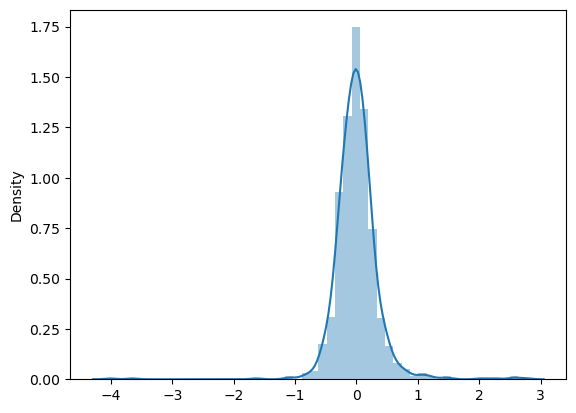

In [57]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

y_pred_train = y_pred_train.reshape(-1,1)
y_pred_test = y_pred_test.reshape(-1,1)


metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

sns.distplot(y_train - y_pred_train, kde=True)
plt.show()

In [58]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.867299,0.834785,0.85752
1,R2 Score (Test),0.686695,0.837502,0.794718
2,RSS (Train),SalePrice 134.256034 dtype: float64,SalePrice 167.151357 dtype: float64,SalePrice 144.149749 dtype: float64
3,RSS (Test),SalePrice 140.026437 dtype: float64,SalePrice 72.625771 dtype: float64,SalePrice 91.747224 dtype: float64
4,MSE (Train),0.362622,0.404615,0.375746
5,MSE (Test),0.565416,0.407201,0.457677


In [59]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm.coef_.reshape(-1,1)
betas['Ridge'] = ridge.coef_.reshape(-1,1)
betas['Lasso'] = lasso.coef_


pd.set_option('display.max_rows', None)
betas.head(80)

,Linear,Ridge,Lasso
LotFrontage,-2.664297e-02,-0.004704,-0.000000
LotArea,4.054235e-02,0.032064,0.037549
YearBuilt,7.509417e-02,0.029111,0.057339
YearRemodAdd,2.092754e-02,0.037424,0.018538
MasVnrArea,9.774196e-02,0.063225,0.069913
BsmtFinSF1,-1.223421e+11,0.033671,0.027004
BsmtFinSF2,-4.327171e+10,0.008893,0.001300
BsmtUnfSF,-1.185248e+11,0.006909,-0.000000
TotalBsmtSF,1.176768e+11,0.045235,0.002627
CentralAir,-1.063156e-02,0.005612,0.000000


In [60]:
betas.sort_values(by='Lasso')

,Linear,Ridge,Lasso
PoolArea,-5.348816e-01,-0.039852,-0.292587
PoolQC,-4.426727e-01,-0.051283,-0.239297
BsmtQual,-1.003914e-01,-0.084537,-0.105724
KitchenQual,-9.252834e-02,-0.082532,-0.091930
MSSubClass,-4.913902e-02,-0.033561,-0.080093
ExterQual,-6.480408e-02,-0.067475,-0.059457
BsmtExposure,-4.633331e-02,-0.041468,-0.043219
FireplaceQu,-3.141403e-02,-0.043642,-0.035457
LowQualFinSF,-2.555256e+09,-0.010143,-0.024140
Condition2,-3.720474e-02,-0.019269,-0.019503


#### Doubling the alpha/lambda values for ridge and lasso and comparing results

In [61]:
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 0.00674703  0.02938444  0.02925881  0.03869566  0.05346009  0.03491719
   0.00549421  0.01036373  0.04876024  0.00965686  0.06088168  0.05190595
  -0.00719526  0.08724337  0.03369665  0.00035784  0.04875409  0.02461257
   0.008039   -0.02288615  0.05182435  0.03980145  0.05307042  0.04467652
   0.03018962  0.00998021 -0.00125833  0.00771786  0.0118267  -0.01655658
   0.00136146  0.00085599 -0.00892551 -0.0238988  -0.00603114  0.01241744
   0.0126014  -0.01971269  0.01616385 -0.00830061 -0.00123274  0.01698361
   0.02669778  0.00136815 -0.01307687 -0.02435727 -0.00684279  0.10488732
   0.02259056  0.01855142  0.03434741 -0.00093904 -0.00173107  0.00140404
  -0.0639045   0.00437479  0.02670484 -0.07358793  0.00847818 -0.03533509
  -0.01275508  0.00060404  0.00169893 -0.02851255  0.00613344 -0.07286007
   0.02606672 -0.04441732 -0.01698852 -0.03045654  0.00789744  0.01220119
   0.00656616 -0.03258497  0.01185173  0.00981345  0.0011967   0.01503868]]


0.8180819420191445
0.8229210165776512
SalePrice    184.049983
dtype: float64
SalePrice    79.142458
dtype: float64
0.18026443031903
0.18069054290961095


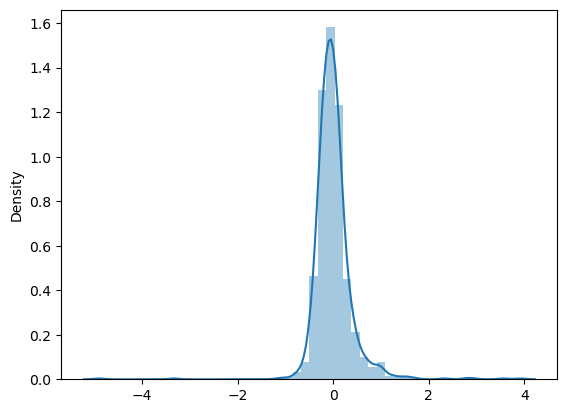

In [62]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

sns.distplot(y_train - y_pred_train, kde=True)
plt.show()



In [63]:
alpha =0.02

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_



array([-0.00000000e+00,  3.32152118e-02,  5.06215796e-02,  1.84071432e-02,
        5.17390526e-02,  1.99281478e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.00253314e-02,  0.00000000e+00,
       -5.88255616e-03,  2.95975781e-01,  5.15198418e-02,  0.00000000e+00,
        1.16598665e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.28709436e-02,  8.42148815e-02,  0.00000000e+00,
        2.04304562e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -6.16334603e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -8.61684838e-02, -0.00000000e+00,  7.23124961e-04,
        8.35706526e-03, -7.73674097e-03,  2.43894832e-02, -4.18450695e-04,
        0.00000000e+00,  1.43301410e-02,  1.22212304e-02,  0.00000000e+00,
       -4.89169375e-03, -0.00000000e+00, -0.00000000e+00,  2.34451533e-01,
        2.94638371e-02,  0.00000000e+00,  2.95901908e-02, -0.00000000e+00,
       -1.57104622e-05,  

0.8367688620566123
0.8379563952759473
SalePrice    165.144068
dtype: float64
SalePrice    72.422649
dtype: float64
0.16174737361580874
0.16534851480813348


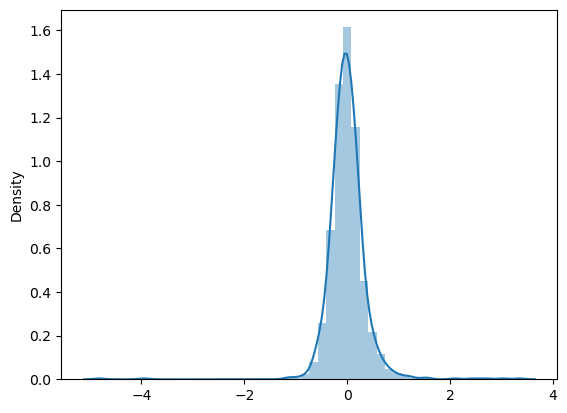

In [64]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

y_pred_train = y_pred_train.reshape(-1,1)
y_pred_test = y_pred_test.reshape(-1,1)


metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

sns.distplot(y_train - y_pred_train, kde=True)
plt.show()



In [65]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

rg_metric1 = pd.Series(metric4, name = 'Ridge Regression - double')
ls_metric1 = pd.Series(metric5, name = 'Lasso Regression - double')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric1, ls_metric1], axis = 1)

final_metric



,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression - double,Lasso Regression - double
0,R2 Score (Train),0.867299,0.834785,0.85752,0.818082,0.836769
1,R2 Score (Test),0.686695,0.837502,0.794718,0.822921,0.837956
2,RSS (Train),SalePrice 134.256034 dtype: float64,SalePrice 167.151357 dtype: float64,SalePrice 144.149749 dtype: float64,SalePrice 184.049983 dtype: float64,SalePrice 165.144068 dtype: float64
3,RSS (Test),SalePrice 140.026437 dtype: float64,SalePrice 72.625771 dtype: float64,SalePrice 91.747224 dtype: float64,SalePrice 79.142458 dtype: float64,SalePrice 72.422649 dtype: float64
4,MSE (Train),0.362622,0.404615,0.375746,0.424576,0.402178
5,MSE (Test),0.565416,0.407201,0.457677,0.425077,0.406631


In [66]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm.coef_.reshape(-1,1)
betas['Ridge'] = ridge.coef_.reshape(-1,1)
betas['Lasso'] = lasso.coef_


pd.set_option('display.max_rows', None)
betas.head(80)

,Linear,Ridge,Lasso
LotFrontage,-2.664297e-02,0.006747,-0.000000
LotArea,4.054235e-02,0.029384,0.033215
YearBuilt,7.509417e-02,0.029259,0.050622
YearRemodAdd,2.092754e-02,0.038696,0.018407
MasVnrArea,9.774196e-02,0.053460,0.051739
BsmtFinSF1,-1.223421e+11,0.034917,0.019928
BsmtFinSF2,-4.327171e+10,0.005494,0.000000
BsmtUnfSF,-1.185248e+11,0.010364,-0.000000
TotalBsmtSF,1.176768e+11,0.048760,0.000000
CentralAir,-1.063156e-02,0.009657,0.000000


In [67]:


betas.sort_values(by='Lasso')

,Linear,Ridge,Lasso
BsmtQual,-1.003914e-01,-0.073588,-0.108335
KitchenQual,-9.252834e-02,-0.072860,-0.089859
MSSubClass,-4.913902e-02,-0.023899,-0.086168
PoolArea,-5.348816e-01,-0.016557,-0.061633
PoolQC,-4.426727e-01,-0.032585,-0.053456
ExterQual,-6.480408e-02,-0.063904,-0.051960
BsmtExposure,-4.633331e-02,-0.035335,-0.039732
FireplaceQu,-3.141403e-02,-0.044417,-0.035536
BsmtFinType1,-7.894516e-03,-0.012755,-0.020210
HeatingQC,-1.353455e-02,-0.028513,-0.007955


In [68]:
betas[(betas['Lasso'] > 0.009) | (betas['Lasso'] < -0.009)].index

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'PoolArea', 'MSSubClass', 'LandContour',
       'LandSlope', 'Neighborhood', 'OverallQual', 'OverallCond', 'RoofMatl',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual',
       'Functional', 'FireplaceQu', 'PoolQC'],
      dtype='object')

In [69]:
betas[betas['Lasso'] != 0].index

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'PoolArea', 'MSSubClass',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'Neighborhood', 'Condition2', 'OverallQual', 'OverallCond', 'RoofMatl',
       'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'SaleCondition'],
      dtype='object')

### Removing 5 most valuable predictor variables as per subjective question and rebuilding the model using Lasso

#### Lets drop these variables as per high beta coefficient positive and negatives: BsmtQual, GrLivArea, MSSubClass, OverallQual, KitchenQual, 

In [81]:
X1 = X
X1 = X1.drop(['OverallQual', 'GrLivArea', 'MSSubClass', 'BsmtQual', 'KitchenQual'], axis=1)

y1 = y

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [82]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X1_train, y1_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
print(model_cv.best_params_)


{'alpha': 0.01}


In [84]:
#Changing aplha to 0.02 as seen earlier that 0.02 give good R2 values for train and test
alpha = 0.02
lasso = Lasso(alpha=alpha)
        
lasso.fit(X1_train, y1_train) 


lasso.coef_

array([-0.        ,  0.02356241,  0.09908647,  0.06196023,  0.06444239,
        0.03103837,  0.        , -0.        ,  0.07287257,  0.        ,
        0.25986133,  0.25234654, -0.        ,  0.048164  ,  0.        ,
        0.03717901,  0.        , -0.        , -0.05646849,  0.00834773,
        0.02901638,  0.12235442,  0.        ,  0.02055027,  0.        ,
       -0.        ,  0.        ,  0.00092085, -0.13290428,  0.        ,
       -0.        , -0.        , -0.        ,  0.01399861,  0.00026915,
       -0.00283127,  0.00404912, -0.        ,  0.        ,  0.00744876,
        0.03012499,  0.        , -0.01581294, -0.04490169, -0.00207747,
        0.03883162,  0.        ,  0.04104386, -0.        , -0.        ,
        0.        , -0.17468001,  0.        ,  0.00947364,  0.        ,
       -0.04770511, -0.        ,  0.        ,  0.        , -0.01782848,
        0.        ,  0.0464627 , -0.07161758, -0.        , -0.0188626 ,
        0.        ,  0.01011176,  0.        , -0.11646176,  0.  

0.8129591329770924
0.8142148578479554
SalePrice    189.232827
dtype: float64
SalePrice    83.033528
dtype: float64
0.18534067323767353
0.1895742653995573


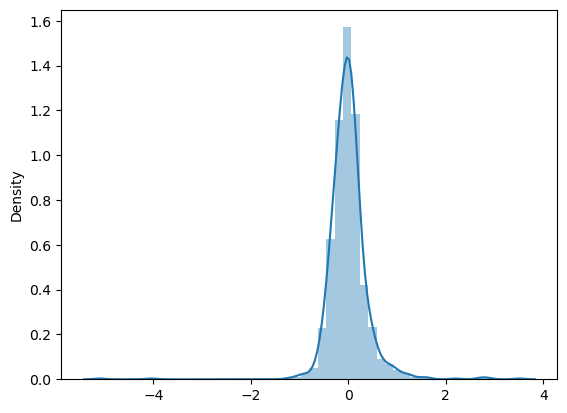

In [85]:
y1_pred_train = lasso.predict(X1_train)
y1_pred_test = lasso.predict(X1_test)

y1_pred_train = y1_pred_train.reshape(-1,1)
y1_pred_test = y1_pred_test.reshape(-1,1)


metric6 = []
r2_train_lr = r2_score(y1_train, y1_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y1_test, y1_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y1_train - y1_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y1_test - y1_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y1_train, y1_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y1_test, y1_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

sns.distplot(y1_train - y1_pred_train, kde=True)
plt.show()


In [86]:
betas = pd.DataFrame(index=X1.columns)
betas.rows = X1.columns


betas['Lasso'] = lasso.coef_


pd.set_option('display.max_rows', None)
betas.head(80)
betas.sort_values(by='Lasso')

,Lasso
ExterQual,-0.174680
PoolArea,-0.132904
PoolQC,-0.116462
FireplaceQu,-0.071618
KitchenAbvGr,-0.056468
BsmtExposure,-0.047705
BldgType,-0.044902
GarageFinish,-0.018863
HeatingQC,-0.017828
Condition2,-0.015813
